# Introduction and Dataset Description
Since this is an introductory article, the problem that we are going to solve is pretty simple. Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. Our dataset looks like this.

In [ ]:
import pandas as pd
import numpy as np

!gdown --id -q 1EJmU7Mli1oXLPJfXGrus0HHfVnXM6wpk
!unzip -q Data.zip

data = pd.read_csv('Data.csv')
data.head()

,Person,Smoking,Obesity,Exercise,Diabetic
0,Person 1,0,1,0,1
1,Person 2,0,0,1,0
2,Person 3,1,0,0,0
3,Person 4,1,1,0,1
4,Person 5,1,1,1,1


In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not from the given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem where we are given inputs and corresponding correct outputs and our task is to find the mapping between the inputs and the outputs.

**Note**: This is just a fictional dataset, in real life, obese people are not necessarily always diabetic.

# The Solution
We will create a very simple neural network with one input layer, one hidden layer (that will contain two hidden units) and one output layer. Before writing any actual code, let's first let's see how our neural network will execute, in theory. For simplicity, we are not considering the bias term.<br>
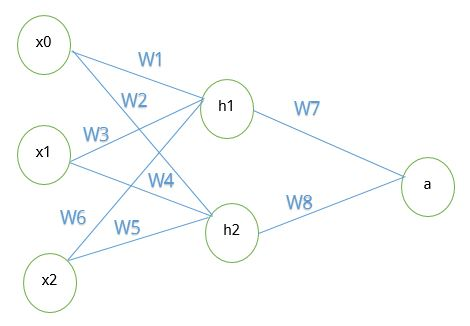



### Separating feature values from labels

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

print(f'X:\n {X}')
print(f'y:\n {y}')

X:
 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
y:
 [[1]
 [0]
 [0]
 [1]
 [1]]


### Weight Initialization
At first, we will consider random weights. We will store the weights values for input layer and hidden layer in matrix `w1`. Weight values for hidden layer and output layer will be stored in matrix `w2`.<br>
Since, there are 3 input units and 2 hidden units, the dimension of matrix `w1` will be 3 × 2. For the same reason, dimension of matrix `w2` will be 2 × 1.

In [ ]:
number_of_neurons_in_input_layer = len(X[0])
number_of_neurons_in_hidden_layer = 2
number_of_neurons_in_output_layer = 1

w1 = np.random.random((number_of_neurons_in_input_layer, number_of_neurons_in_hidden_layer))
w2 = np.random.random((number_of_neurons_in_hidden_layer, number_of_neurons_in_output_layer))

print(f'w1:\n {w1}')
print(f'w2:\n {w2}')

w1:
 [[0.10349165 0.19761654]
 [0.07107635 0.07374558]
 [0.48644549 0.16289995]]
w2:
 [[0.95875465]
 [0.01068502]]


## Forward Propagation
At first, we will calculate the weighted sum by multiplying `X` with `w1`. Let this result be $z_{h}$.<br>
$$z_h = \sum_{i=1}^{X} x_iw_{1_i}$$

In [ ]:
z_h=np.matmul(X,w1)
print(f'z_h:\n {z_h}')

z_h:
 [[0.0710763542188434 0.07374557535167514]
 [0.48644548572535706 0.16289994568014987]
 [0.10349164667036814 0.1976165379165512]
 [0.17456800088921154 0.27136211326822635]
 [0.6610134866145686 0.4342620589483762]]


$z_{h}$ is the value of hidden layer. To keep this value between 0 and 1, we will pass it through a `sigmoid` function and calculate `a_h`.<br>
$$sigmoid = \frac{1}{1+_e{-x}}$$

In [ ]:
def sigmoid(x):
    return (1/(1+np.exp(-x.astype(float))))

In [ ]:
a_h = sigmoid(z_h)
print(f'a_h:\n {a_h}')

a_h:
 [[0.51776161 0.51842804]
 [0.61926872 0.54063517]
 [0.52584984 0.54924398]
 [0.54353151 0.56742727]
 [0.65948802 0.60689095]]


Now we'll calculate the value of output layer by multiplying the value of hidden layer `a_h` with `w2`. Then, we'll pass the resultant value through a sigmoid function which in turn will return us the final value `a_o`.<br>
$$z_o = \sum_{i=1}^{} a_{h_i}w_{2_i}$$<br>
$$a_o = sigmoid(z_o)$$


In [ ]:
z_o=np.matmul(a_h,w2)
a_o=sigmoid(z_o)
print(f'a_o:\n {a_o}')

a_o:
 [[0.62291649]
 [0.6455427 ]
 [0.62481343]
 [0.6288243 ]
 [0.65447578]]


But, this is not our final output. We'll calculate the `error` from the difference between our ground truth `y` and `a_o`.<br>
$$error, E_{a_o} = \frac{1}{2} (a_o-y)^2$$

In [ ]:
error = (0.5*(np.power((a_o-y),2)))
print(f'error:\n {error}')

error:
 [[0.07109598840292192]
 [0.20836268866212068]
 [0.1951959110849411]
 [0.06888570122484873]
 [0.059693492247065494]]


## Back Propagation

### Updating `w2`
Back Propagation will start now. This means that in order to minimize the error that we have received, we will repeatedly update the weights of the `w1` and `w2` matrix back from the output layer and calculate the error. In this way we can reduce the error a lot at a time and predict the value which will be closer to the actual output.<br>

So first we will find out how much change in the weights of `w2` will reduce our error. We will deduct the value of $\frac {dE_{a_o}}{dw_2}$ from $w_2$.<br>
$$w_2 = w_2 - learningRate×\frac{dEa_o}{dw_2}$$.<br>
From the chain rule of calculus, we can calculate the value of $\frac {dE_{a_o}}{dw_2}$ as follows,<br>

$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{da_o} × \frac {d{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{da_o} = \frac{d}{da_o}(\frac{1}{2} (a_o-y)^2)=a_o-y$$<br>


In [ ]:
dEdao = a_o-y
print(f'dEdao:\n {dEdao}')

dEdao:
 [[-0.37708351436497967]
 [0.6455426998458285]
 [0.6248134298891808]
 [-0.371175702935547]
 [-0.34552421694308344]]


Now, the second therm which is needed to calculate $\frac {dE_{a_o}}{dw_2}$ is basically the derivative of the `sigmoid` function.<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}(\frac{1}{1+_e{-z_o}})$<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}({1+_e{-z_o}})^{-1}$<br>
$\frac{da_o}{dz_o} = (-1)({1+_e{-z_o}})^{-2}(-e^{-z_o})$<br>
....<br>....<br>
$\frac{da_o}{dz_o} =\frac{1}{1+_e{-z_o}}×(1-\frac{1}{1+_e{-z_o}}) = sigmoid(z_o)×(1-sigmoid(z_o))=a_o×(1-a_o)$

In [ ]:
def sigmoid_derivative(x):
    return x*(1-x)
daozo = sigmoid_derivative(a_o)
print(f'daozo:\n {daozo}')

daozo:
 [[0.23489154]
 [0.22881732]
 [0.23442161]
 [0.2334043 ]
 [0.22613723]]


The last term,<br>
$$\frac{dz_o}{dw_2} = \frac{d}{dw_2}(a_h×w_2) = a_h$$<br>
Now, we have all the necessary information to calculate $\frac {dE_{a_o}}{dw_2}$

In [ ]:
dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
print(f'dEdw2:\n {dEdw2}')

dEdw2:
 [[0.024016055176844422]
 [0.017808025070625573]]


Now, we'll update the weight values of `w2` by subtracting $\frac{dEa_o}{dw_2}$ from `w2`. But, for faster convergence, we'll multiply $\frac{dEa_o}{dw_2}$ by `learning_rate = 3`.

In [ ]:
learning_rate = 3
w2 = w2 - learning_rate*dEdw2
print(f'w2:\n {w2}')

w2:
 [[0.8867064891529188]
 [-0.042739051137241156]]


### Updating `w1`
Now we will go one more step backward. The updated value of `w1` will be, $$w_1 = w_1 - learningRate×\frac{dEa_o}{dw_1}$$.<br>
Now, using chain rule as before, we will calculate the value of $\frac{dEa_o}{dw_1}$.<br>


$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{dz_h}×\frac{dz_h}{dw_1}$$
$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{da_h}×\frac{da_h}{dz_h}×\frac{dz_h}{dw_1}$$
Since, there is no direct relationship between $dEa_o$ and $da_h$, we have to break them again using chain rule as follows.
$$\frac{dEa_o}{da_h} = \frac{dEa_o}{dz_o}×\frac{dz_o}{da_h} = \frac{dEa_o}{da_o}×\frac{da_o}{dz_o}×\frac{dz_o}{da_h}$$
But, we have already calculated the value of $\frac{dEa_o}{da_o}×\frac{da_o}{dz_o}$ while updating `w2`. So,
$$\frac{dz_o}{da_h} = \frac{d}{da_h}(a_h×w_2) = w_2$$

In [ ]:
dEdzo = dEdao*daozo
dEdah = np.matmul(dEdzo, w2.T)
print(f'dEdah:\n {dEdah}')

dEdah:
 [[-0.07853889803595969 0.0037855570253332916]
 [0.13097661447480044 -0.006313043033178743]
 [0.12987569442353758 -0.00625997893706066]
 [-0.07681893468171824 0.003702655182784095]
 [-0.06928360084380414 0.0033394538053559734]]


We have successfully calculated the value of $\frac{dEa_o}{da_h}$. As it is the derivative of sigmoid, $$\frac{da_h}{dz_h} = a_h\times(1-a_h)$$

In [ ]:
dahdzh = sigmoid_derivative(a_h)
print(f'dahdzh:\n {dahdzh}')

dahdzh:
 [[0.24968453 0.24966041]
 [0.23577497 0.24834878]
 [0.24933179 0.24757503]
 [0.24810501 0.24545356]
 [0.22456357 0.23857433]]


Now, for the last term to calculate $\frac{dEa_o}{dw_1}$,$$\frac{dz_h}{dw_1} = \frac{d}{dw_1}(X×w_1) = X$$

In [ ]:
dEdw1 = np.matmul(X.T, dEdah*dahdzh)
print(f'dEdw1:\n {dEdw1}')

dEdw1:
 [[-0.0022355965018989784 0.00015572337054095282]
 [-0.05422768275790445 0.002650641554235369]
 [0.015322434669576898 -0.000771128617501693]]


Now, we'll update the weight values of `w1` by subtracting $\frac{dEa_o}{dw_1}$ from `w1`.

In [ ]:
w1 = w1-learning_rate*dEdw1
print(f'w1:\n {w1}')

w1:
 [[0.11019843617606508 0.19714936780492834]
 [0.23375940249255672 0.06579365068896903]
 [0.44047818171662634 0.16521333153265494]]


# Prediction

In [ ]:
def predict(X,w1,w2):
    return sigmoid(np.matmul(sigmoid(np.matmul(X,w1)),w2))

In [ ]:
prediction = predict(X, w1,w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

prediction probabilities:
 [[0.61606171]
 [0.62628627]
 [0.60928024]
 [0.62121178]
 [0.64175015]]
prediction:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Training
Let's run for 500 epochs and check whether the loss decreases or not. In the mean time, the prediction should get better.

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

w1 = np.random.random((3,2))
w2 = np.random.random((2,1))

epochs = 50
learning_rate = 3

for i in range(0, epochs):
    z_h=np.matmul(X,w1)
    a_h = sigmoid(z_h)
    z_o=np.matmul(a_h,w2)
    a_o=sigmoid(z_o)
    error = (0.5*(np.power((a_o-y),2)))
    print(f'error in epoch {i+1}: {np.sum(error)}')


    dEdao = a_o-y
    daozo = sigmoid_derivative(a_o)
    dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
    learning_rate = 3
    w2 = w2 - learning_rate*dEdw2

    dEdzo = dEdao*daozo
    dEdah = np.matmul(dEdzo, w2.T)
    dahdzh = sigmoid_derivative(a_h)
    dEdw1 = np.matmul(X.T, dEdah*dahdzh)
    w1 = w1-learning_rate*dEdw1

prediction = predict(X, w1, w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

error in epoch 1: 0.6016890710790768
error in epoch 2: 0.5917440463129184
error in epoch 3: 0.584734625983793
error in epoch 4: 0.5789404225898918
error in epoch 5: 0.5738318819346266
error in epoch 6: 0.5690971203519045
error in epoch 7: 0.5645182844079516
error in epoch 8: 0.5599272848427965
error in epoch 9: 0.5551811832624735
error in epoch 10: 0.5501464950460616
error in epoch 11: 0.5446884603308002
error in epoch 12: 0.5386634495293744
error in epoch 13: 0.5319136710759208
error in epoch 14: 0.5242639686720001
error in epoch 15: 0.5155209605920476
error in epoch 16: 0.5054751632870408
error in epoch 17: 0.4939070629526213
error in epoch 18: 0.48059829417590555
error in epoch 19: 0.46534901927984246
error in epoch 20: 0.4480020640379707
error in epoch 21: 0.42847311815181244
error in epoch 22: 0.40678422011087445
error in epoch 23: 0.383094976969054
error in epoch 24: 0.35772315443068564
error in epoch 25: 0.3311446556995546
error in epoch 26: 0.3039643717799636
error in epoch 27:

### Tasks
1. Implement a neural network model to categorize three species of Iris. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any libraries other than `numpy` and `pandas` is prohibited. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch.

1. Implement a neural network model to categorize three species of Iris using **Keras** library from python. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any library is permissible. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch. This [link](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) might help you implementing a neural network with **Keras**.

1. For the task `2`, experiment with different number of hidden layers (*2, 4, 6*) to increase the accuracy score. Also show the effect of followings on overall performance: **different activation function (*relu, sigmoid, tanh*) for layers**, **different optimizers (*Adam, Adagrad, Adadelta*)**, and **various learning rates (*1, 0.1, 0.01*)**.
<br>
<br>
*N.B.: Any additional experiment (such as, Early Stopping) with justification or training insights will contain bonus points.*
    

In [ ]:
!unzip -q archive.zip

In [ ]:
#Preprocessing of the dataset
iris_data=pd.read_csv("Iris.csv")
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris_data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
iris_data.drop("Id",axis=1,inplace=True)

In [ ]:
iris_data.replace({"Iris-virginica": 0,"Iris-versicolor":1,"Iris-setosa":2},inplace=True)
iris_data["Iris-virginica"]=iris_data['Species'].apply(lambda x: 1 if x ==0 else 0)
iris_data["Iris-versicolor"]=iris_data['Species'].apply(lambda x: 1 if x ==1 else 0)
iris_data["Iris-setosa"]=iris_data['Species'].apply(lambda x: 1 if x ==2 else 0)
iris_data.drop("Species",axis=1,inplace=True)

In [ ]:
iris_data=iris_data.sample(frac=1).reset_index(drop=True)
for col in iris_data.columns[:4]:
  iris_data[col]=(iris_data[col]-iris_data[col].mean())/iris_data[col].std()

In [ ]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-virginica,Iris-versicolor,Iris-setosa
0,-1.139200,-0.124540,-1.336794,-1.308593,0,0,1
1,1.276066,0.106090,0.930239,1.181053,1,0,0
2,0.430722,-1.969583,0.420157,0.394849,0,1,0
3,-1.139200,0.106090,-1.280118,-1.439627,0,0,1
4,-0.293857,-0.355171,-0.089926,0.132781,0,1,0


In [ ]:
def split_train_test(data, test_ratio):
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

iris_data_train,iris_data_test =split_train_test(iris_data,0.2)
iris_data_train,iris_data_valid=split_train_test(iris_data_train,0.2) 

In [ ]:
print(iris_data_train.shape)
print(iris_data_test.shape)
print(iris_data_valid.shape)

(96, 7)
(30, 7)
(24, 7)


In [ ]:

Y_train=iris_data_train.iloc[:,4:]
X_train=iris_data_train.iloc[:,0:4]

Y_test=iris_data_test.iloc[:,4:]
X_test=iris_data_test.iloc[:,0:4]

Y_valid=iris_data_valid.iloc[:,4:]
X_valid=iris_data_valid.iloc[:,0:4]

In [ ]:
X_train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,0.672249,-0.816431,0.873564,0.918985
57,0.672249,0.336720,0.873564,1.443121
107,-1.380727,0.336720,-1.223442,-1.308593
109,-0.535384,1.489872,-1.280118,-1.308593
103,-0.173094,-1.277692,0.703536,1.050019
104,-0.776911,-0.816431,0.080102,0.263815
23,-1.743017,0.336720,-1.393470,-1.308593
2,0.430722,-1.969583,0.420157,0.394849
6,0.913776,-0.355171,0.476833,0.132781
11,-0.173094,-0.355171,0.250129,0.132781


In [ ]:
Y_train.head()

,Iris-virginica,Iris-versicolor,Iris-setosa
134,1,0,0
57,1,0,0
107,0,0,1
109,0,0,1
103,1,0,0


### Solution: Task - 1

In [ ]:
# Codes for Task 1
iris_data_np = X_train.to_numpy()
X = iris_data_np
y = Y_train.to_numpy()

X_t=X_valid.to_numpy()
y_t=Y_valid.to_numpy()



arr1=[]
arr2=[]
arr3=[]
def predict_(X,w1,w2,w3):
    return sigmoid(np.matmul(sigmoid(np.matmul(sigmoid(np.matmul(X,w1)),w2)),w3))
train_error=[]
validation_error=[] 
train_acc=[]
validation_acc=[]
def train(X,y,X_t,y_t,early_stopping=False):
  number_of_neurons_in_input_layer = X_train.shape[1]
  number_of_neurons_in_hidden_layer = 6
  number_of_neurons_in_hidden_layer2 = 4
  number_of_neurons_in_output_layer = 3

  w1 = np.random.random((number_of_neurons_in_input_layer, number_of_neurons_in_hidden_layer))
  w2 = np.random.random((number_of_neurons_in_hidden_layer, number_of_neurons_in_hidden_layer2))
  w3 = np.random.random((number_of_neurons_in_hidden_layer2, number_of_neurons_in_output_layer))  
  epochs = 1000
  learning_rate = 0.1   
  
  for i in range(0, epochs):
    arr1.append(w1.tolist())
    arr2.append(w2.tolist())
    arr3.append(w3.tolist())
    z_h=np.matmul(X,w1)
    a_h=sigmoid(z_h)
    z_h2=np.matmul(a_h,w2)
    a_h2=sigmoid(z_h2)
    z_o=np.matmul(a_h2,w3)
    a_o=sigmoid(z_o)


    z_h_v=np.matmul(X_t,w1)
    a_h_v=sigmoid(z_h_v)
    z_h2_v=np.matmul(a_h_v,w2)
    a_h2_v=sigmoid(z_h2_v)
    z_o_v=np.matmul(a_h2_v,w3)
    a_o_v=sigmoid(z_o_v)
    error = (0.5*(np.power((a_o-y),2)))
    valid_error=(0.5*(np.power((a_o_v-y_t),2)))
    pred = predict_(X, w1, w2,w3)
    pred_valid=predict_(X_t,w1,w2,w3)
    acc=(np.sum(y==np.round(pred),axis=1)==3).sum()
    valid_acc=(np.sum(y_t==np.round(pred_valid),axis=1)==3).sum()
    print(f'error in epoch {i+1}: {np.sum(error)}')
    print(f'\t Accuracy in epoch {i+1}: {acc*100/len(X)}%')
    print(f'\nValidation error in epoch {i+1}: {np.sum(valid_error)}')
    print(f'\tValidation Accuracy in epoch {i+1}: {valid_acc*100/len(X_t)}%')
    train_acc.append(acc*100/len(X))
    validation_acc.append(valid_acc*100/len(X_t))
    train_error.append(float(np.sum(error)))
    validation_error.append(float(np.sum(valid_error)))
    if(early_stopping==True):
      if(i>0 and validation_error[i]-validation_error[i-1]>0.3):
        break    
    dEdao = a_o-y
    daozo = sigmoid_derivative(a_o)
    dEdw3 = np.matmul(a_h2.T, (dEdao*daozo))
    
    w3 = w3 - learning_rate*dEdw3

    dEdzo = dEdao*daozo
    dEdah2 = np.matmul(dEdzo, w3.T)
    dahdzh2 = sigmoid_derivative(a_h2)
    dEdw2 = np.matmul(a_h.T, dEdah2*dahdzh2)
   
    w2 = w2-learning_rate*dEdw2
   
    dEdzh = dEdah2*dahdzh2
    dEdah = np.matmul(dEdzh, w2.T)
    dahdzh = sigmoid_derivative(a_h)
    dEdw1 = np.matmul(X.T, dEdah*dahdzh)
   
    w1 = w1-learning_rate*dEdw1
  print(f'w1:\n {w1}')
  print(f'w2:\n {w2}')
  print(f'w3:\n {w3}')   
train(X,y,X_t,y_t,early_stopping=True)    
  
w1=np.array(arr1[-2])
w2=np.array(arr2[-2])
w3=np.array(arr3[-2])
prediction = predict_(X, w1, w2,w3)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

error in epoch 1: 60.35436999708253
	 Accuracy in epoch 1: 0.0%

Validation error in epoch 1: 14.906904627533692
	Validation Accuracy in epoch 1: 0.0%
error in epoch 2: 35.281551903096954
	 Accuracy in epoch 2: 33.333333333333336%

Validation error in epoch 2: 8.442361617910079
	Validation Accuracy in epoch 2: 37.5%
error in epoch 3: 32.108558356549516
	 Accuracy in epoch 3: 0.0%

Validation error in epoch 3: 8.087845037839212
	Validation Accuracy in epoch 3: 0.0%
error in epoch 4: 31.817059418539394
	 Accuracy in epoch 4: 0.0%

Validation error in epoch 4: 7.927638549382747
	Validation Accuracy in epoch 4: 0.0%
error in epoch 5: 31.8091994250059
	 Accuracy in epoch 5: 0.0%

Validation error in epoch 5: 7.918880150534633
	Validation Accuracy in epoch 5: 0.0%
error in epoch 6: 31.80301496023136
	 Accuracy in epoch 6: 0.0%

Validation error in epoch 6: 7.918061455853572
	Validation Accuracy in epoch 6: 0.0%
error in epoch 7: 31.796744939614378
	 Accuracy in epoch 7: 0.0%

Validation erro

In [ ]:
len(X_t)

24

In [ ]:
def test(X,y):
    X=X_test.to_numpy()
    y=Y_test.to_numpy()
    z_h=np.matmul(X,w1)
    a_h=sigmoid(z_h)
    z_h2=np.matmul(a_h,w2)
    a_h2=sigmoid(z_h2)
    z_o=np.matmul(a_h2,w3)
    a_o=sigmoid(z_o) 
    pred_test=predict_(X,w1,w2,w3)
    error = (0.5*(np.power((a_o-y),2)))
    acc=(np.sum(y==np.round(pred_test),axis=1)==3).sum()
    print(f'\t Accuracy : {acc*100/len(X)} %')
    print(f'error in Test set:  {np.sum(error)}')    
test(X_test,Y_test)    

	 Accuracy : 96.66666666666667 %
error in Test set:  1.1587936840130888


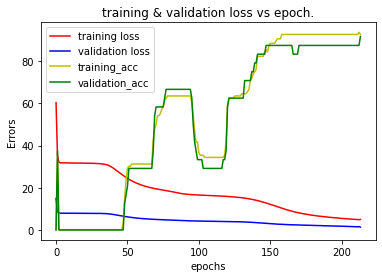

In [ ]:
import matplotlib.pyplot as plt
plt.title("training & validation loss vs epoch.")
plt.plot(np.arange(len(train_error)-1),train_error[:-1],"r")
plt.plot(np.arange(len(validation_error)-1),validation_error[:-1],"b")
plt.plot(np.arange(len(train_acc)-1),train_acc[:-1],"y")
plt.plot(np.arange(len(validation_acc)-1),validation_acc[:-1],"g")
plt.legend(["training loss","validation loss","training_acc","validation_acc"])
plt.xlabel("epochs")
plt.ylabel("Errors")
plt.show()

### Solution: Task - 2

In [ ]:
# Codes for Task 2
import tensorflow as tf
import tensorflow.keras as keras
mode = keras.models.Sequential([
keras.layers.InputLayer(input_shape=4,dtype='float32'),
keras.layers.Dense(6, activation="relu"),
keras.layers.Dense(4, activation="relu"),
keras.layers.Dense(3, activation="softmax")
])
mode.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 0.6953 - accuracy: 0.3125 - val_loss: 0.6919 - val_accuracy: 0.2500
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.3542 - val_loss: 0.6866 - val_accuracy: 0.2917
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.3750 - val_loss: 0.6814 - val_accuracy: 0.3750
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.4062 - val_loss: 0.6753 - val_accuracy: 0.4167
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.4271 - val_loss: 0.6689 - val_accuracy: 0.5417
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.4583 - val_loss: 0.6619 - val_accuracy: 0.5417
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.4896 - val_loss: 0.6539 - val_accuracy: 0.5417
Epoch 8/50
12/12 [=

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 122ms/step - loss: 0.2226 - accuracy: 0.9000


[0.2225990891456604, 0.8999999761581421]

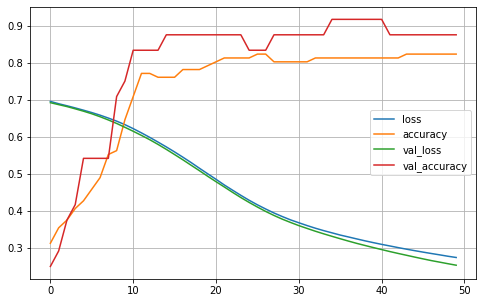

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

None


### Solution: Task - 3

In [ ]:
from tensorflow.python.keras.layers.core import Dense
# Codes for Task 3
model2 = keras.models.Sequential([
keras.layers.InputLayer(input_shape=4,dtype='float32'),
keras.layers.Dense(6, activation="relu"),
keras.layers.Dense(4, activation="relu"),
keras.layers.Dense(6,activation="relu"),
keras.layers.Dense(8,activation="relu"),
keras.layers.Dense(3, activation="softmax")
])
model2.summary()
model3 = keras.models.Sequential([
keras.layers.InputLayer(input_shape=4,dtype='float32'),
keras.layers.Dense(6, activation="relu"),
keras.layers.Dense(4, activation="relu"),
keras.layers.Dense(6,activation="relu"),
keras.layers.Dense(8,activation="relu"),
keras.layers.Dense(3,activation="relu"),
keras.layers.Dense(6,activation="relu"),
keras.layers.Dense(3, activation="softmax")
])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 30        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 6)                 30        
                                                                 
 dense_6 (Dense)             (None, 8)                 56        
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
__________________________________

In [ ]:

model2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history2=model2.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.6782 - accuracy: 0.6042 - val_loss: 0.6656 - val_accuracy: 0.6250
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6458 - val_loss: 0.6561 - val_accuracy: 0.6250
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6613 - accuracy: 0.6458 - val_loss: 0.6462 - val_accuracy: 0.6250
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6458 - val_loss: 0.6354 - val_accuracy: 0.6250
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6458 - val_loss: 0.6233 - val_accuracy: 0.6250
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6458 - val_loss: 0.6114 - val_accuracy: 0.6250
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6175 - accuracy: 0.6458 - val_loss: 0.5985 - val_accuracy: 0.6250
Epoch 8/50
12/12 [=

Model with 4 hidden layers

In [ ]:
model2.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 145ms/step - loss: 0.1499 - accuracy: 1.0000


[0.14993639290332794, 1.0]

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history3=model3.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 0.6899 - accuracy: 0.3021 - val_loss: 0.6889 - val_accuracy: 0.2500
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.3750 - val_loss: 0.6843 - val_accuracy: 0.2917
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.3125 - val_loss: 0.6793 - val_accuracy: 0.2917
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.3125 - val_loss: 0.6739 - val_accuracy: 0.2917
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.3125 - val_loss: 0.6674 - val_accuracy: 0.2917
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.3125 - val_loss: 0.6587 - val_accuracy: 0.2917
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.3125 - val_loss: 0.6469 - val_accuracy: 0.2917
Epoch 8/50
12/12 [=

Model with 6 hidden layers

In [ ]:
model3.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 140ms/step - loss: 0.2438 - accuracy: 0.7667


[0.24377962946891785, 0.7666666507720947]

In [ ]:
model_sigmoid = keras.models.Sequential([
keras.layers.InputLayer(input_shape=4,dtype='float32'),
keras.layers.Dense(6, activation="sigmoid"),
keras.layers.Dense(4, activation="sigmoid"),
keras.layers.Dense(3, activation="softmax")
])
model_sigmoid.summary()
model_tanh=keras.models.Sequential([
keras.layers.InputLayer(input_shape=4,dtype='float32'),
keras.layers.Dense(6, activation=keras.activations.tanh),
keras.layers.Dense(4, activation=keras.activations.tanh),
keras.layers.Dense(3, activation="softmax")
])
model_tanh.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 30        
                                                                 
 dense_16 (Dense)            (None, 4)                 28        
                                                                 
 dense_17 (Dense)            (None, 3)                 15        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 30        
                                                                 
 dense_19 (Dense)            (None, 

In [ ]:
model_sigmoid.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history3=model_sigmoid.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
12/12 [==============================] - 1s 17ms/step - loss: 0.9588 - accuracy: 0.3333 - val_loss: 0.9412 - val_accuracy: 0.3750
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9376 - accuracy: 0.3333 - val_loss: 0.9209 - val_accuracy: 0.3750
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9179 - accuracy: 0.3333 - val_loss: 0.9019 - val_accuracy: 0.3750
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8995 - accuracy: 0.3333 - val_loss: 0.8843 - val_accuracy: 0.3750
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8823 - accuracy: 0.3333 - val_loss: 0.8679 - val_accuracy: 0.3750
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8664 - accuracy: 0.3333 - val_loss: 0.8526 - val_accuracy: 0.3750
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8516 - accuracy: 0.3333 - val_loss: 0.8385 - val_accuracy: 0.3750
Epoch 8/50
12/12 [=

Model with sigmoid activation function

In [ ]:
model_sigmoid.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 112ms/step - loss: 0.6329 - accuracy: 0.3000


[0.632863461971283, 0.30000001192092896]

In [ ]:
model_tanh.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history3=model_tanh.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 0.7197 - accuracy: 0.2708 - val_loss: 0.6833 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.3646 - val_loss: 0.6670 - val_accuracy: 0.4167
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.4479 - val_loss: 0.6512 - val_accuracy: 0.5000
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.5521 - val_loss: 0.6365 - val_accuracy: 0.5833
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6146 - val_loss: 0.6230 - val_accuracy: 0.7500
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.6771 - val_loss: 0.6107 - val_accuracy: 0.7500
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6285 - accuracy: 0.7083 - val_loss: 0.5990 - val_accuracy: 0.7917
Epoch 8/50
12/12 [=

Model with tanh activation function

In [ ]:
model_tanh.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 110ms/step - loss: 0.3111 - accuracy: 0.9667


[0.311061292886734, 0.9666666388511658]

In [ ]:

mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(), metrics=['accuracy'])
history3=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.2720 - accuracy: 0.8229 - val_loss: 0.2529 - val_accuracy: 0.8750
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.8229 - val_loss: 0.2525 - val_accuracy: 0.8750
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.8229 - val_loss: 0.2521 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.8229 - val_loss: 0.2518 - val_accuracy: 0.8750
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.8229 - val_loss: 0.2515 - val_accuracy: 0.8750
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.8229 - val_loss: 0.2512 - val_accuracy: 0.8750
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.8229 - val_loss: 0.2509 - val_accuracy: 0.8750
Epoch 8/50
12/12 [=

Model with Adagrad Optimizer and 2 hidden layers

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.2148 - accuracy: 0.9000


[0.21477381885051727, 0.8999999761581421]

In [ ]:
mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history3=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
12/12 [==============================] - 1s 28ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2435 - val_accuracy: 0.8750
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2435 - val_accuracy: 0.8750
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2435 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2435 - val_accuracy: 0.8750
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2434 - val_accuracy: 0.8750
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2434 - val_accuracy: 0.8750
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8333 - val_loss: 0.2434 - val_accuracy: 0.8750
Epoch 8/50
12/12 [=

Model with Adadelta Optimizer and 2 hidden layers

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.2146 - accuracy: 0.9000


[0.21458452939987183, 0.8999999761581421]

In [ ]:
mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.2573 - accuracy: 0.8229 - val_loss: 0.2195 - val_accuracy: 0.8750
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.8438 - val_loss: 0.1943 - val_accuracy: 0.9167
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.8646 - val_loss: 0.1725 - val_accuracy: 0.9167
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.8750 - val_loss: 0.1619 - val_accuracy: 0.9167
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9271 - val_loss: 0.1593 - val_accuracy: 0.9167
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1532 - accuracy: 0.9375 - val_loss: 0.1374 - val_accuracy: 0.9167
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1379 - accuracy: 0.9271 - val_loss: 0.1240 - val_accuracy: 0.9167
Epoch 8/50
12/12 [=

Model with Adam Optimizer and learning rate of 0.01

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 110ms/step - loss: 0.0206 - accuracy: 1.0000


[0.020557371899485588, 1.0]

In [ ]:
mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1), metrics=['accuracy'])
history=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 2.0849 - accuracy: 0.5625 - val_loss: 0.9829 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8496 - accuracy: 0.2812 - val_loss: 0.7799 - val_accuracy: 0.2917
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.3542 - val_loss: 0.6933 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.3021 - val_loss: 0.6418 - val_accuracy: 0.2917
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.3333 - val_loss: 0.6416 - val_accuracy: 0.3333
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.7291 - accuracy: 0.3021 - val_loss: 0.6566 - val_accuracy: 0.3750
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.3542 - val_loss: 0.6887 - val_accuracy: 0.3333
Epoch 8/50
3/3 [===

Model with Adam Optimizer and learning rate of 1

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 344ms/step - loss: 0.6482 - accuracy: 0.2667


[0.6481872797012329, 0.2666666805744171]

In [ ]:
mode.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
history=mode.fit(X_train, Y_train, epochs=50, batch_size=8,validation_data=(X_valid,Y_valid),callbacks=[early_stopping_cb])
_, accuracy = mode.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.6504 - accuracy: 0.3125 - val_loss: 0.6422 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6381 - accuracy: 0.3438 - val_loss: 0.6343 - val_accuracy: 0.3750
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.2917 - val_loss: 0.6359 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.3542 - val_loss: 0.6355 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.3333
Accuracy: 33.33


Model with Adam Optimizer and learning rate of 0.1

In [ ]:
mode.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.6437 - accuracy: 0.3000


[0.6436540484428406, 0.30000001192092896]